In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import sklearn

ds_class = pd.read_csv("csgo_class.csv")
#ds_reg = pd.read_csv("csgo_reg.csv")

# в них есть непонятный столбец Unnamed. Удаляем его
ds_class = ds_class.drop('Unnamed: 0', axis=1)
#ds_reg = ds_reg.drop('Unnamed: 0', axis=1)

In [177]:
ds_class

,time_left,t_score,ct_score,t_money,ct_money,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner
0,114.94,9.0,5.0,4500.0,750.0,5.0,5.0,500.0,500.0,False,T
1,114.95,13.0,14.0,9200.0,3200.0,5.0,5.0,500.0,500.0,False,CT
2,34.73,4.0,3.0,7900.0,2600.0,4.0,2.0,327.0,200.0,False,CT
3,38.45,12.0,8.0,750.0,5900.0,5.0,4.0,292.0,380.0,False,T
4,174.91,4.0,5.0,30700.0,12600.0,5.0,5.0,500.0,500.0,False,T
...,...,...,...,...,...,...,...,...,...,...,...
99995,114.94,15.0,4.0,12750.0,350.0,5.0,5.0,500.0,500.0,False,CT
99996,175.00,0.0,2.0,22500.0,15450.0,5.0,5.0,500.0,500.0,False,T
99997,94.95,2.0,0.0,10350.0,11900.0,5.0,5.0,500.0,500.0,False,T
99998,14.91,4.0,6.0,650.0,6000.0,2.0,2.0,139.0,131.0,False,CT


In [178]:
# Здесь я исключаю ситуации, когда один выживший игрок убивает пятрых, четверых или троих и выигрывает раунд (так называемый клатч) 
# На практике, конечно, такое может быть, но очень маловероятно (46 на 100к). Такие ситуации просто сбивают с толку нейронку
len_data = len(ds_class)
i = 0
while i < len_data:
    if ds_class['ct_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
        ds_class = ds_class.drop(index = i)
        len_data -= 1
    elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
        ds_class = ds_class.drop(index = i)
        len_data -= 1
    if ds_class['ct_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 4 and ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
        ds_class = ds_class.drop(index = i)
        len_data -= 1
    elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 4 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
        ds_class = ds_class.drop(index = i)
        len_data -= 1
    if ds_class['ct_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 3 and ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
        ds_class = ds_class.drop(index = i)
        len_data -= 1
    elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 3 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
        ds_class = ds_class.drop(index = i)
        len_data -= 1
    i += 1
   
ds_class

,time_left,t_score,ct_score,t_money,ct_money,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner
0,114.94,9.0,5.0,4500.0,750.0,5.0,5.0,500.0,500.0,False,T
1,114.95,13.0,14.0,9200.0,3200.0,5.0,5.0,500.0,500.0,False,CT
2,34.73,4.0,3.0,7900.0,2600.0,4.0,2.0,327.0,200.0,False,CT
3,38.45,12.0,8.0,750.0,5900.0,5.0,4.0,292.0,380.0,False,T
4,174.91,4.0,5.0,30700.0,12600.0,5.0,5.0,500.0,500.0,False,T
...,...,...,...,...,...,...,...,...,...,...,...
99995,114.94,15.0,4.0,12750.0,350.0,5.0,5.0,500.0,500.0,False,CT
99996,175.00,0.0,2.0,22500.0,15450.0,5.0,5.0,500.0,500.0,False,T
99997,94.95,2.0,0.0,10350.0,11900.0,5.0,5.0,500.0,500.0,False,T
99998,14.91,4.0,6.0,650.0,6000.0,2.0,2.0,139.0,131.0,False,CT


In [179]:
# также я исключаю ситуации, когда 5 на 5, разница в деньгах <= 5к и разница в раундах <= 3 (тут даже человеку почти нереально определить победителя)

len_data = len(ds_class)
i = 0
while i < len_data:
    if ds_class['ct_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 5 and \
    abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) <= 5000 and \
    abs(ds_class['t_score'].loc[ds_class.index[i]] - ds_class['ct_score'].loc[ds_class.index[i]]) <= 3:
        try:
            ds_class = ds_class.drop(index = i)
            len_data -= 1
        except:
            i += 1
            next
        
    i += 1
    
ds_class

,time_left,t_score,ct_score,t_money,ct_money,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner
0,114.94,9.0,5.0,4500.0,750.0,5.0,5.0,500.0,500.0,False,T
1,114.95,13.0,14.0,9200.0,3200.0,5.0,5.0,500.0,500.0,False,CT
2,34.73,4.0,3.0,7900.0,2600.0,4.0,2.0,327.0,200.0,False,CT
3,38.45,12.0,8.0,750.0,5900.0,5.0,4.0,292.0,380.0,False,T
4,174.91,4.0,5.0,30700.0,12600.0,5.0,5.0,500.0,500.0,False,T
...,...,...,...,...,...,...,...,...,...,...,...
99995,114.94,15.0,4.0,12750.0,350.0,5.0,5.0,500.0,500.0,False,CT
99996,175.00,0.0,2.0,22500.0,15450.0,5.0,5.0,500.0,500.0,False,T
99997,94.95,2.0,0.0,10350.0,11900.0,5.0,5.0,500.0,500.0,False,T
99998,14.91,4.0,6.0,650.0,6000.0,2.0,2.0,139.0,131.0,False,CT


In [180]:
# еще исключаю ситуации 5 на 5, где команда с перевосом денег в >= 10к проигрывает (на игровом сленге когда выигрывают эко раунды)

len_data = len(ds_class)
i = 0
while i < len_data:
    if ds_class['ct_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 5 and \
    abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) >= 10000 and \
    ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
        try:
            ds_class = ds_class.drop(index = i)
            len_data -= 1
        except:
            i += 1
            next
            
    elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 5 and \
    abs(ds_class['ct_money'].loc[ds_class.index[i]] - ds_class['t_money'].loc[ds_class.index[i]]) >= 10000 and \
    ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
        try:
            ds_class = ds_class.drop(index = i)
            len_data -= 1
        except:
            i += 1
            next
        
    i += 1
    
ds_class

,time_left,t_score,ct_score,t_money,ct_money,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner
0,114.94,9.0,5.0,4500.0,750.0,5.0,5.0,500.0,500.0,False,T
1,114.95,13.0,14.0,9200.0,3200.0,5.0,5.0,500.0,500.0,False,CT
2,34.73,4.0,3.0,7900.0,2600.0,4.0,2.0,327.0,200.0,False,CT
3,38.45,12.0,8.0,750.0,5900.0,5.0,4.0,292.0,380.0,False,T
5,34.91,13.0,6.0,5800.0,3150.0,1.0,2.0,100.0,71.0,False,CT
...,...,...,...,...,...,...,...,...,...,...,...
99995,114.94,15.0,4.0,12750.0,350.0,5.0,5.0,500.0,500.0,False,CT
99996,175.00,0.0,2.0,22500.0,15450.0,5.0,5.0,500.0,500.0,False,T
99997,94.95,2.0,0.0,10350.0,11900.0,5.0,5.0,500.0,500.0,False,T
99998,14.91,4.0,6.0,650.0,6000.0,2.0,2.0,139.0,131.0,False,CT


In [181]:
# преобразовываем нечисловые данные в числовые
ds_class_num = pd.get_dummies(ds_class)
ds_class_num.head(10)

,time_left,t_score,ct_score,t_money,ct_money,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner_CT,round_winner_T
0,114.94,9.0,5.0,4500.0,750.0,5.0,5.0,500.0,500.0,False,0,1
1,114.95,13.0,14.0,9200.0,3200.0,5.0,5.0,500.0,500.0,False,1,0
2,34.73,4.0,3.0,7900.0,2600.0,4.0,2.0,327.0,200.0,False,1,0
3,38.45,12.0,8.0,750.0,5900.0,5.0,4.0,292.0,380.0,False,0,1
5,34.91,13.0,6.0,5800.0,3150.0,1.0,2.0,100.0,71.0,False,1,0
7,14.91,8.0,9.0,2850.0,1100.0,3.0,2.0,300.0,82.0,False,1,0
8,74.91,0.0,4.0,13150.0,28350.0,5.0,5.0,449.0,373.0,False,1,0
9,174.95,12.0,7.0,24800.0,11250.0,5.0,5.0,500.0,500.0,False,0,1
10,27.73,0.0,0.0,0.0,900.0,2.0,0.0,178.0,0.0,True,1,0
11,66.83,16.0,15.0,7900.0,2450.0,5.0,2.0,401.0,200.0,False,1,0


In [182]:
# не преобразовался bool bomb_planted. Приводим в тип int
ds_class_num["bomb_planted"] = ds_class_num["bomb_planted"].astype(int)
ds_class_num

,time_left,t_score,ct_score,t_money,ct_money,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner_CT,round_winner_T
0,114.94,9.0,5.0,4500.0,750.0,5.0,5.0,500.0,500.0,0,0,1
1,114.95,13.0,14.0,9200.0,3200.0,5.0,5.0,500.0,500.0,0,1,0
2,34.73,4.0,3.0,7900.0,2600.0,4.0,2.0,327.0,200.0,0,1,0
3,38.45,12.0,8.0,750.0,5900.0,5.0,4.0,292.0,380.0,0,0,1
5,34.91,13.0,6.0,5800.0,3150.0,1.0,2.0,100.0,71.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,114.94,15.0,4.0,12750.0,350.0,5.0,5.0,500.0,500.0,0,1,0
99996,175.00,0.0,2.0,22500.0,15450.0,5.0,5.0,500.0,500.0,0,0,1
99997,94.95,2.0,0.0,10350.0,11900.0,5.0,5.0,500.0,500.0,0,0,1
99998,14.91,4.0,6.0,650.0,6000.0,2.0,2.0,139.0,131.0,0,1,0


<AxesSubplot:>

C:\Users\artem\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


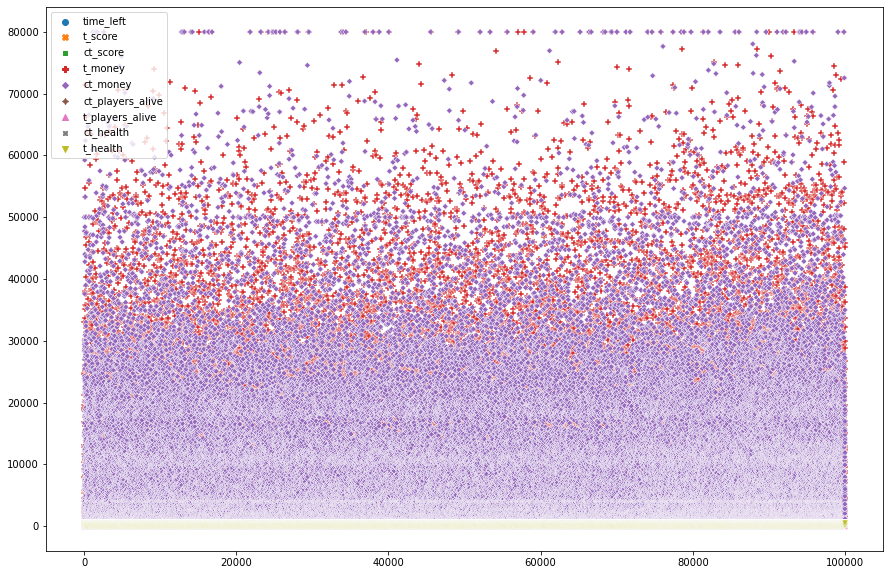

In [183]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=ds_class_num[ds_class_num.columns[:-3]])

# как видно на графике (ось ординат, три последних столбца отбросили), до нормализации довольно далеко, значения лежат в диапозоне от 0 до 80 000

<AxesSubplot:>

C:\Users\artem\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


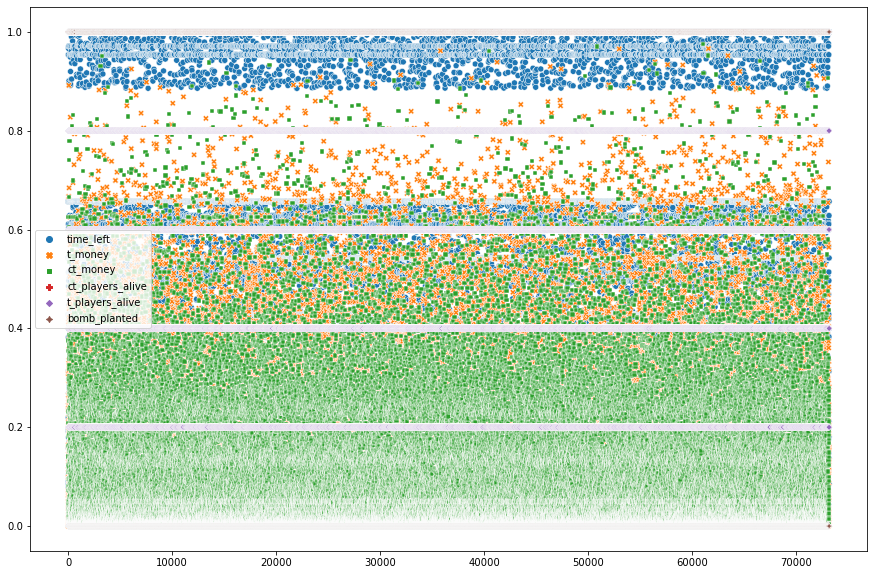

In [184]:
import sklearn.preprocessing as preprocessing

# Данный нормализатор выравнивает данные относительно максимального по модулю
ma_scaler = preprocessing.MaxAbsScaler()
ma_scaler.fit(ds_class_num)
ma_norm_data = pd.DataFrame(columns=ds_class_num.columns, data=ma_scaler.transform(ds_class_num))

plt.figure(figsize=(15, 10))
sns.scatterplot(data=ma_norm_data[['time_left', 't_money', 'ct_money', 'ct_players_alive', 't_players_alive', 'bomb_planted']])

# отбрасываем победителя (т.к. там и так значения 0 и 1) и здоровье (портят график, но они в нормальном виде). Видим, что теперь данные лежат в диапозоне
# от нуля до 1. При этом стоит обратить внимание на фиолетовые и красные точки (живые игроки). Они принимают значения от 0 до 5
# и видим, что теперь значения 0, 0.2, 0.4, 0.6, 0.8 и 1, т.е. единицу разделили на 6 частей.
# что касается денег, то если максимум - это 80 000, то подавляющее большинство времени у команд значение денег примерно до 0.4
# т.е. это примерно 40% от максимума

In [185]:
# тут при необходимости убрать (добавить) столбцы
# ma_norm_data = ma_norm_data[['t_score', 'ct_score', 't_money', 'ct_money', 'ct_players_alive', 't_players_alive', 'ct_health', 't_health', 'bomb_planted', 'round_winner_CT', 'round_winner_T']]
ma_norm_data

,time_left,t_score,ct_score,t_money,ct_money,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner_CT,round_winner_T
0,0.656800,0.272727,0.15625,0.056250,0.009375,1.0,1.0,1.000,1.000,0.0,0.0,1.0
1,0.656857,0.393939,0.43750,0.115000,0.040000,1.0,1.0,1.000,1.000,0.0,1.0,0.0
2,0.198457,0.121212,0.09375,0.098750,0.032500,0.8,0.4,0.654,0.400,0.0,1.0,0.0
3,0.219714,0.363636,0.25000,0.009375,0.073750,1.0,0.8,0.584,0.760,0.0,0.0,1.0
4,0.199486,0.393939,0.18750,0.072500,0.039375,0.2,0.4,0.200,0.142,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73148,0.656800,0.454545,0.12500,0.159375,0.004375,1.0,1.0,1.000,1.000,0.0,1.0,0.0
73149,1.000000,0.000000,0.06250,0.281250,0.193125,1.0,1.0,1.000,1.000,0.0,0.0,1.0
73150,0.542571,0.060606,0.00000,0.129375,0.148750,1.0,1.0,1.000,1.000,0.0,0.0,1.0
73151,0.085200,0.121212,0.18750,0.008125,0.075000,0.4,0.4,0.278,0.262,0.0,1.0,0.0


In [188]:
# переопределение переменных
# В перепенной X_train хранятся данные для тренировки сети (входные (время, деньги, живые игроки и т.д.))
# В перепенной Y_train хранятся данные для тренировки сети (выходные или правильные ответы (кто победил))
from sklearn.model_selection import train_test_split

X = ma_norm_data[ma_norm_data.columns[:-2]]
Y = ma_norm_data[ma_norm_data.columns[-1:]]

# Делим
# Делить будем в отношении 80/20
# 80 - это обучение
# 20 - тест
# первым делом перемешаем выборку (надо для того что бы обе выборки были репрезентативными)
XY_data = np.hstack( (X, Y) ).transpose((0,1))
np.random.shuffle(XY_data)
# Делим выборки
point_split = round(XY_data.shape[0] * 0.8)
train_data = XY_data[:point_split]
test_data = XY_data[point_split:]
print(f'Всего данных: {XY_data.shape[0]}')
print(f'Тренировочных данных: {train_data.shape[0]}')
print(f'Тестовых данных: {test_data.shape[0]}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
Y
# в Y террористы, т.е. предсказываю победу или поражение террористов
# 1 - победа, 0 - поражение

Всего данных: 73153
Тренировочных данных: 58522
Тестовых данных: 14631


,round_winner_T
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
73148,0.0
73149,1.0
73150,1.0
73151,0.0


In [189]:
import keras

# Строка отвечает за подключение сущности Dense которая реализует простой полносвязный слой сети (FFN)
from keras.layers import Dense

# Строка отвечает за подключение сущности Sequential которая реализует саму нейронную сеть
from keras.models import Sequential

# Это импорт (activations) содержи в себе список функций активации для сети
from keras import activations

# Тут мы подключаем алгоритмы тренировки Адам и алгоритм обратного распостранения ошибки(RMSprop)
from keras.optimizers import Adam, RMSprop

# Подключаем фукцию подсчета ошибки сети (кросэтропися для данных представленных в виде категорий)
from keras.losses import categorical_crossentropy, binary_crossentropy

# Подключаем фукцию подсчета метрики сети (точность попадания в категорию)
from keras.metrics import categorical_accuracy, binary_accuracy

# библиотека дополнительных возможностей (действий) при обучении сети
from keras import callbacks

# функция для создания новой нейронной сети
def make_nn(input_len, output_len):
    # Создаем сущность сети
    model = Sequential()
    
    # Добавляем слой сети из 10 нейронов с функцией активации Relu и количеством входов равным количеству столбцов во входном массиве
    model.add(Dense(20, activation=activations.relu, input_dim=input_len))
    
    model.add(Dense(20, activation=activations.relu))
    
    # Добавляем последний слой(выходной) количество нейронов равно количеству столбцов в выходном массиве и функцией активации sigmoid
    # в двух словах она нужна для бинарной классификации
    # бинарная классификация - это, например, в нашем случае предсказать победу террористов (один единственный выход)
    # 1 - победили, 0 - проиграли
    # в другом случае можно использовать, например, softmax
    model.add(Dense(output_len, activation=activations.sigmoid))
    
    # Компилируем (собираем) сеть с параметрами:
    # алгоритм обучения: Adam
    # Функция обивки: binary_crossentropy (опять же для бинарных)
    # в других категориальных случаях: categorical_crossentropy
    # дополнительные метрики:
    # categorical_accuracy
    model.compile(Adam(), binary_crossentropy, metrics=['acc'])
    
    return model

from pathlib import Path
from os import remove

# создадим функцию создания о очистки каталога контрольных точек
# указываем шаблон имени фала контрольной точки
file_name = 'nn_model_loss-{loss:.2f}_val_loss-{val_loss:.2f}_acc-{acc:.2f}_val_acc-{val_acc:.2f}.hdf5'

def make_save_points(name='save_points', file_name=file_name):
    # выбираем катагол (подробнее https://docs.python.org/3.6/library/pathlib.html ) 
    checkpoints_dir = Path('./').joinpath('save_points')
    print(f'Текущий каталог с контрольными точками {checkpoints_dir.absolute()}')
    # Создаем каталог если его нету
    checkpoints_dir.mkdir(exist_ok=True)
    # Удаляем все из каталога
    for item in checkpoints_dir.iterdir():
        if item.is_file():
            print(f'Удаляем файл {item}')
            remove(item)
    return str(checkpoints_dir.joinpath(file_name))

In [190]:
"""Запускаем обучение сети с параметрами:

1 параметр: матрица с входным массивом
2 параметр: матрица с требуемыми ответами (выходная матрица)
verbose=0 : устанавливаем уровень вывода отладочной информации на 0 уровень
epochs=25 : задаем количество эпох для обучения (100 для начала более чем достаточно)
batch_size=3 : размер группы для обучения (пакетный метод), где говорится как часто пересчитывать веса сети (влияет на скорость и что более важно на качество обучения (параметр подбирается опытным путем))"""


# создаем новую нейронную сеть
model = make_nn(X_train.shape[1], Y_train.shape[1])

print('Начинаем обучение сети')
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=4,
    epochs=100,
    verbose=1,
    validation_data=(X_test, Y_test),
    callbacks=[
        callbacks.History(),
        callbacks.EarlyStopping(
            # На основе какого значения будет приниматься решеня об остановке
            monitor='val_acc',
            # Указываем направления лучшего значения (min, max, auto) лучшим является если тестовая точноть будет максимальной
            mode='max',
            # Количество эпох в резельтате которых если значение не изменилось, то произвести остановку
            patience=10,
            # "Чуствительность" метода - изменения ниже данного значения дубут считатья 0 (изменения в отслеживаемом значении нету)
            min_delta=0.0001,
        ),
        # Callback сохранений состояний сети
        callbacks.ModelCheckpoint(
            # Указываем путь для сохранения и формат имен файлов
            make_save_points(file_name=file_name),
            # Указываем какое значение отслеживать
            monitor='val_acc',
            # Указываем, что сохранять надо только лучшие результаты
            save_best_only=True,
            # Говорим как часто проверять, что текущий результат лучше предидущего (в эпохах)
            period=2,
            # Указываем сторону лучших значений
            mode='max'
        )
    ]
    
)
print('Обучение закончено')

# val_acc - это точность попаданий (угадал 65 из 100. точность 0.65 (порог 0.5)) больше - лучше
# val_loss - это расстояние между прогнозом и действительным значением. меньше - лучше
#model.fit(X_train, y_train, verbose=2, epochs=25, batch_size=3)

Начинаем обучение сети
Текущий каталог с контрольными точками C:\Users\artem\new_machine\save_points
Удаляем файл save_points\nn_model_loss-0.53_val_loss-0.53_acc-0.70_val_acc-0.70.hdf5
Удаляем файл save_points\nn_model_loss-0.54_val_loss-0.54_acc-0.69_val_acc-0.69.hdf5
Удаляем файл save_points\nn_model_loss-0.55_val_loss-0.55_acc-0.68_val_acc-0.68.hdf5
Удаляем файл save_points\nn_model_loss-0.56_val_loss-0.56_acc-0.67_val_acc-0.68.hdf5
Epoch 1/100
14631/14631 [==============================] - 19s 1ms/step - loss: 0.5693 - acc: 0.6654 - val_loss: 0.5592 - val_acc: 0.6738
Epoch 2/100
14631/14631 [==============================] - 19s 1ms/step - loss: 0.5536 - acc: 0.6779 - val_loss: 0.5615 - val_acc: 0.6683
Epoch 3/100
14631/14631 [==============================] - 19s 1ms/step - loss: 0.5506 - acc: 0.6803 - val_loss: 0.5555 - val_acc: 0.6761
Epoch 4/100
14631/14631 [==============================] - 19s 1ms/step - loss: 0.5473 - acc: 0.6838 - val_loss: 0.5508 - val_acc: 0.6864
Epoch 5

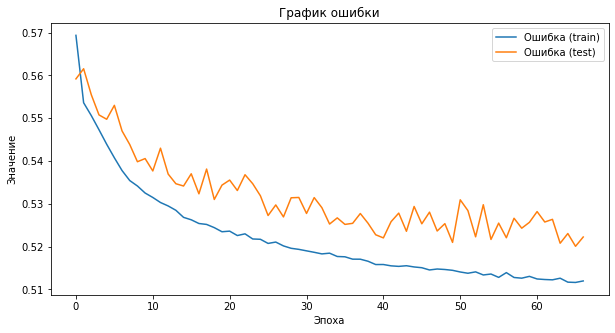

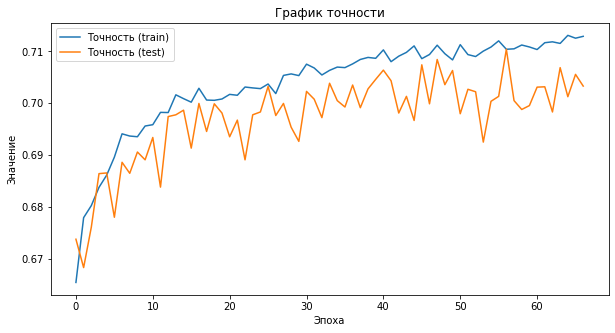

In [191]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

In [192]:
from keras.models import load_model

# Загружаем контрольную точку (модель)
# Обратите внимание путь до контрольной точки может отличатся
loaded_model = load_model('./save_points/nn_model_loss-0.51_val_loss-0.52_acc-0.71_val_acc-0.71.hdf5')

# Прдсказываем класс
print(f'Точность предсказания на тренировочных данных {loaded_model.evaluate(X_train, Y_train)[1]}')
print(f'Точность предсказания на тестовых данных {loaded_model.evaluate(X_test, Y_test)[1]}')
predict = loaded_model.predict(X_test)
predict

1829/1829 [==============================] - 2s 1ms/step - loss: 0.5117 - acc: 0.7152
Точность предсказания на тренировочных данных 0.7151669263839722
458/458 [==============================] - 1s 1ms/step - loss: 0.5236 - acc: 0.7084
Точность предсказания на тестовых данных 0.7084273099899292
458/458 [==============================] - 0s 952us/step


array([[0.5058549 ],
       [0.21924917],
       [0.49182597],
       ...,
       [0.52201563],
       [0.46884358],
       [0.52930164]], dtype=float32)

In [193]:
# получаем вероятность
#loaded_model.predict(X_test)
# получаем классы (но у нас он один)
#loaded_model.predict(X_test).argmax(axis=1)

458/458 [==============================] - 0s 1ms/step


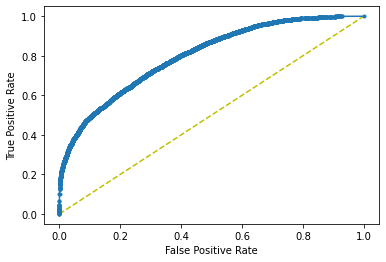

In [194]:
# ROC кривая
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve

y_pred_proba = loaded_model.predict(X_test).ravel()
fpr, tpr, th = roc_curve(Y_test, y_pred_proba)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot (fpr, tpr, marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [207]:
# Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.
# метрика F1 грубо говоря объединяет их (больше - лучше). Это точность нейронки (т.е. например я предсказываю победу с точностью 70%)
# Про порог. Вот нейронка выплюнула число от 0 до 1. Например 0.234. У меня бинарная классификация, т.е. террористы либо победили (1),
# либо проиграли (0). Чем выплюнутое число ближе к 1, тем больше вероятность, что террористы победили. И наоборот: чем ближе к нулю, то скорее всего
# проиграли. Надо установить порог: "при каком значении засчитывать победу, а при каком - поражение". Установили порог 0.4. У нас на выходе 0.234.
# 0.234 < 0.4, значит террористы скорее всего проиграли. Этот порог довольно сильно влияет на точность F1
# P.s. порог 0.5 далеко не всегда является лучшим решением
porog = 0.41
print('F1')
print(f1_score(Y_test, loaded_model.predict(X_test) >= porog))
print('Recall')
print(recall_score(Y_test, loaded_model.predict(X_test) >= porog))
print('Precision')
print(precision_score(Y_test, loaded_model.predict(X_test) >= porog))

F1
458/458 [==============================] - 0s 937us/step
0.7447020969710418
Recall
458/458 [==============================] - 0s 917us/step
0.8935037273695421
Precision
458/458 [==============================] - 0s 908us/step
0.6383869126878448


(73153, 2)
1314/1314 [==============================] - 1s 941us/step


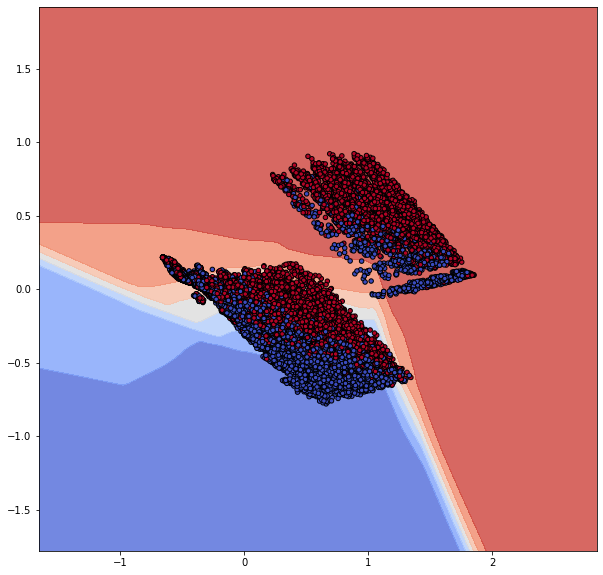

In [209]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf(xx, yy)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

from sklearn.decomposition import PCA

# Задаем ту модель, которую будем использовать для рисования графика
model_clf = loaded_model

pca = PCA(n_components=2)

_X = pca.fit_transform(X)
print(_X.shape)

clf_predict = lambda xx, yy: model_clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

X0, X1 = _X[:, 0], _X[:, 1]
xx, yy = make_meshgrid(X0, X1)

clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y.apply(lambda x: x).values, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# НОЛЬ -синяя, красная - 1
# красные - победили Т. Синияя - победили КТ